# Please do Vote up if you liked my work

Context

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mobile-price-classification/test.csv
/kaggle/input/mobile-price-classification/train.csv


**Load Data and libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("input/train.csv")
test=pd.read_csv("input/test.csv")

# Work With Data

**Data Visualization **

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8db97566a0>,
      dtype=object)

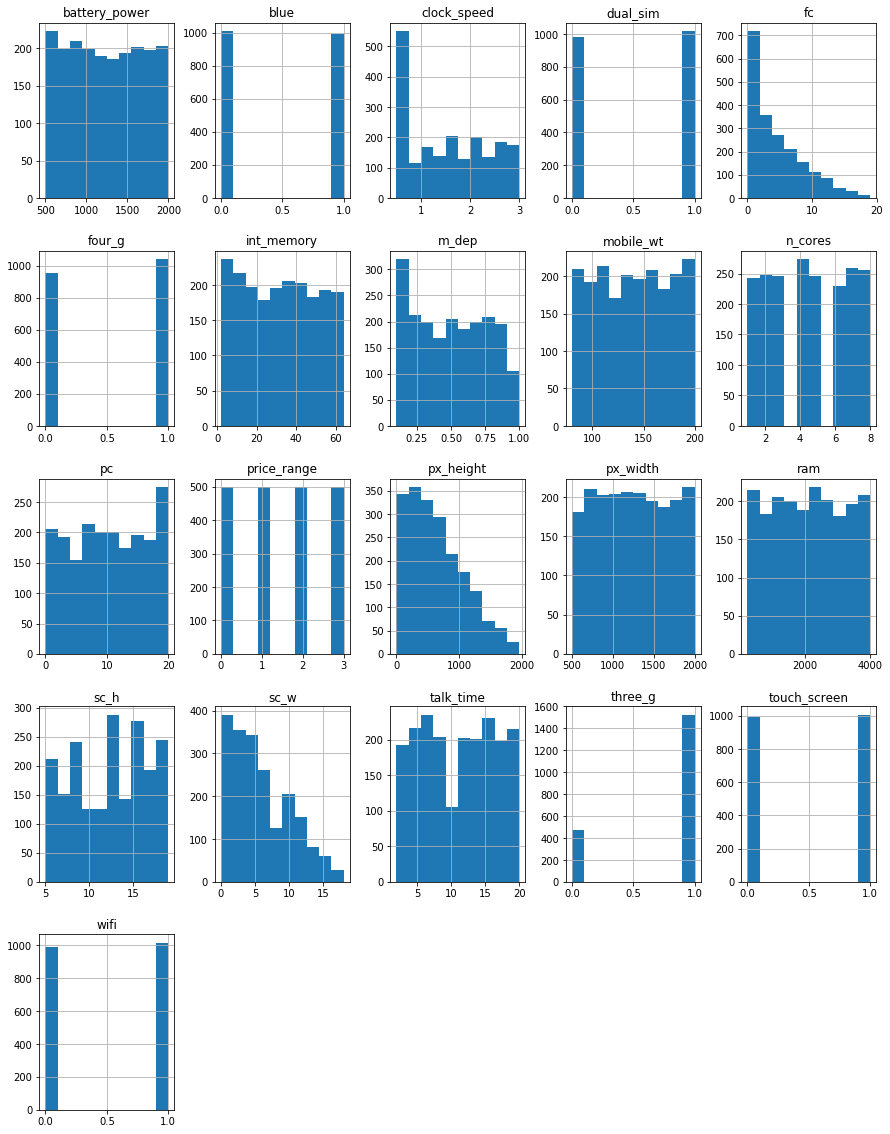

In [4]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

**Check the shape of the data**

In [5]:
print(data.shape)
data.head()

(2000, 21)


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [6]:
print(test.shape)
test.head()

(1000, 21)


id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

**Data Columns Name**

In [7]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Are There any Null Values??**

In [8]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Data Types **
No String Data

In [9]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Spliting Data To X and Y

In [10]:
X=data.drop(['price_range'],axis=1)

Our Target is price_range

In [11]:
Y=data['price_range']

Spliting data to use it in the model

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=4,test_size=0.2)

# Bulding Our Model 
We will use LinearRegression model

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Check How the model is good ?


In [14]:
from sklearn.metrics import mean_squared_error
predict=lr.predict(x_test)
mean_squared_error(predict,y_test)

0.10147538505653879

In [15]:
lr.score(x_test,y_test)

0.9225197607787784

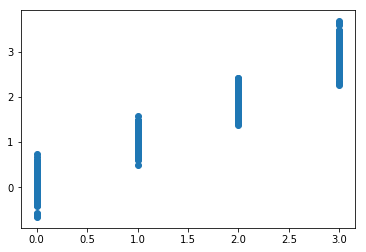

In [16]:
plt.scatter(y_test,predict)
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [18]:
knn_predict=knn.predict(x_test)
print(knn.score(x_test,y_test))
print(mean_squared_error(knn_predict,y_test))

0.9525
0.0475


# Conclusion: KNN performed the best

# Now Let's Predict the price Range of the test file

In [19]:
test=test.drop(['id'],axis=1)
test_predict=knn.predict(test)

In [20]:
print(test_predict)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 0 3 1 1 3 3 2 0 2 0 1 1 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 1 3 0 0 3 2 1 2 0 3 2 3 1 0 2 1 1 3 1 1 0 3 2 1 2 1 2 2 3 3 2
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 2 2 2 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 2
 3 1 0 1 0 3 0 1 0 2 2 1 2 0 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1 3 2 0 3 0 0 3 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 1 3 1 3 1 3 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 1 1 0 3 2 3 3 1 3 1 3 1 3 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 3 0 0 3 1 1 0 3 2 3 0 3 0 2 3 3 3 0 2 0 2 3 0 1 1 0 0 1
 1 1 3 3 3 2 3 1 2 2 2 3 

In [21]:
pd.DataFrame(test_predict).head()

0
0  3
1  3
2  2
3  3
4  1

In [22]:
test['price_range']=test_predict
test.head(50)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            1043     1          1.8         1  14       0           5    0.1   
1             841     1          0.5         1   4       1          61    0.8   
2            1807     1          2.8         0   1       0          27    0.9   
3            1546     0          0.5         1  18       1          25    0.5   
4            1434     0          1.4         0  11       1          49    0.5   
5            1464     1          2.9         1   5       1          50    0.8   
6            1718     0          2.4         0   1       0          47    1.0   
7             833     0          2.4         1   0       0          62    0.8   
8            1111     1          2.9         1   9       1          25    0.6   
9            1520     0          0.5         0   1       0          25    0.5   
10           1500     0          2.2         0   2       0          55    0.6   
11           1343     0          2.9         0   2       1          34    0.8   
12            900     1          1.4         1   0       0          30    1.0   
13           1190     1          2.2         1   5       0          19    0.9   
14            630     0          1.8         0   8       1          51    0.9   
15           1846     1          1.0         0   5       1          53    0.7   
16           1985     0          0.5         1  14       1          26    1.0   
17           1042     0          2.9         0   5       1          48    0.2   
18           1231     1          1.7         1   2       1          37    0.2   
19           1488     0          2.6         0   9       0          37    0.7   
20            968     0          0.6         0   8       1           7    0.7   
21            529     0          2.6         1   1       0          60    0.5   
22           1558     0          1.7         1   7       0          50    0.1   
23            533     1          0.7         1  16       0          58    0.8   
24           1037     0          1.7         1   1       0           5    0.7   
25           1025     0          1.6         1   6       1          43    0.7   
26           1858     0          3.0         1   0       0          17    0.6   
27            980     0          0.5         0   1       0           8    0.1   
28            644     1          0.5         1   9       0          15    0.2   
29           1024     1          1.6         1   0       1          38    0.8   
30           1981     0          2.9         1   2       1          11    0.3   
31           1380     0          2.6         1  15       1          56    0.5   
32           1557     1          1.7         1   1       0          32    0.3   
33           1201     1          2.2         1  10       0          49    0.8   
34           1074     1          1.2         0   0       0          45    0.8   
35           1175     1          2.1         0   3       0          33    0.9   
36           1280     0          0.9         1   4       1           8    0.6   
37           1715     0          0.6         1   1       1          28    0.4   
38           1165     0          0.9         0   4       0          40    0.9   
39            567     0          2.6         0   0       0           2    0.2   
40           1952     1          1.4         0   2       0          47    0.8   
41            822     1          1.4         1   2       0          43    0.3   
42            685     1          0.5         1   0       0          12    0.5   
43           1388     1          0.6         1  12       1          17    0.6   
44           1972     0          2.1         0   2       0          48    0.6   
45           1411     1          1.7         0   9       1          57    0.5   
46           1094     0          2.3         1   2       0          20    0.9   
47           1653     0          0.7         1   1       1          13    0.5   
48            916     0          2.